##### TUGAS PRAKTIKUM : Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

##### Langkah 1: Mengimpor Library dan Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('../data/insurance.csv')

##### Langkah 2: Memahami Data

In [64]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Setelah melihat data diatas, dan dapat dilihat terdapat data yang memiliki variabel kategorik. Hal ini menyebabkan data tidak bisa diproses. Maka dari itu diperlukan proses encoding yaitu mengubah variabel kategorik menjadi variabel numerik

##### Langkah 3: Proses Encoding

In [66]:
# proses encoding data kategorik
le = LabelEncoder() 
data['sex'] = le.fit_transform(data['sex']) 
data['smoker'] = le.fit_transform(data['smoker']) 
data['region'] = le.fit_transform(data['region']) 

# menampilkan hasil encoding
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


- Setelah melakukan encoding, maka variabel yang sebelumnya adalah variabel kategorik berubah menjadi variabel numerik dan sudah bisa digunakan dan dilakukan perhitungan

##### Langkah 4: Memvisualisasikan data dengan mengidentifikasi variabel yang akan digunakan pada variabel bebas (fitur) dan variabel target (biaya medis personal)

- Memvisualisasikan dan menentukan variabel bebas dan variabel target sangat penting dilakukan untuk memahami pola, korelasi, dan relevansi fitur dalam data. Hal ini juga membantu dalam menganalisis data yang lebih baik

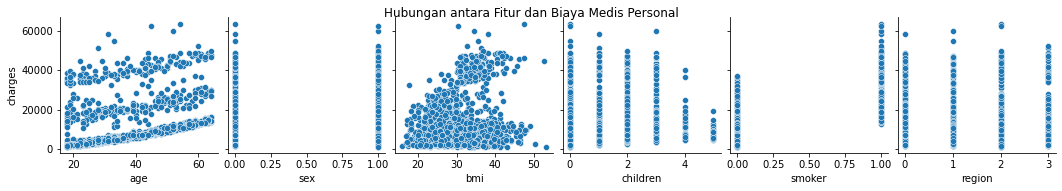

In [69]:
# Pairplot untuk melihat hubungan antara variabel bebas dan target
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars=['charges'])
plt.suptitle('Hubungan antara Fitur dan Biaya Medis Personal', y=1.02)

# Tampilkan plot
plt.show()

##### Langkah 5: Membagi dataset menjadi data latih dan data uji dengan proporsi 80:20

- Setelah melakukan langkah 4, kita juga perlu membagi dataset menjadi data latih dan data uji untuk menilai dan membandingkan nilai berbagai model. Proporsi 80:20 digunakan karena memberikan keseimbangan yang baik antara data latih dan data uji

In [71]:
from sklearn.model_selection import train_test_split
# Pisahkan variabel bebas (fitur) dan variabel target
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Langkah 6: Melatih Model pada Data Latih

- Melatih model pada data latih diperlukan untuk memungkinkan model mengekstraksi pola dari data yang dapat digunakan untuk membuat prediksi yang akurat pada data yang belum pernah dilihat pada sebelumnya, seperti data uji. Kode dari melatih model pada data latih bisa dilihat dibawah ini

In [72]:
from sklearn.linear_model import LinearRegression
# Membuat objek model
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

LinearRegression()

- Kode diatas mengimpor model regresi linear dari library Scikit-Learn dan membuat objek model. Kemudian, dengan menggunakan data latih (X_train dan y_train), model dilatih untuk memahami hubungan antara fitur-fitur (X_train) dan variabel target (y_train).

##### Langkah 7: Memprediksi Data Uji

In [73]:
# Untuk membuat prediksi pada data uji
y_pred = model.predict(X_test)

a. Scatter Plot


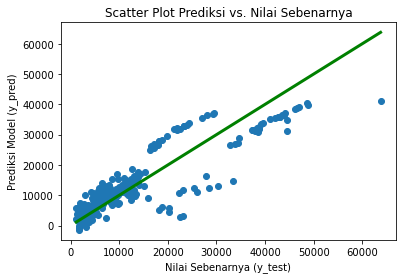

In [78]:
# Membuat scatter plot untuk membandingkan prediksi dengan nilai sebenarnya
plt.scatter(y_test, y_pred)
print('a. Scatter Plot')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Prediksi Model (y_pred)")
plt.title("Scatter Plot Prediksi vs. Nilai Sebenarnya")

# Menambahkan garis regresi (garis diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-', linewidth=3)
plt.show()

- Scatter plot digunakan untuk memvisualisasikan data titik-titik dan hubungan antar dua variabel. Dalam kode diatas, saya melakukan prediksi data uji dengan model yang sudah dilatih sebelumnya. Kemudian saya membuat scatter plot yang membandingan nilai sebenarnya (y_test) dengan prediksi model (y_pred) untuk melihat sejauh mana prediksi model mendekati nilai sebenarnya

b. Histogram Residual


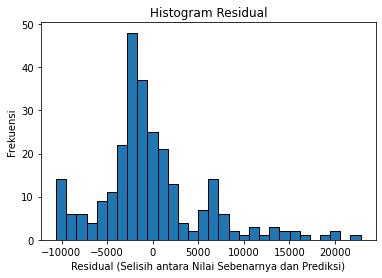

In [79]:
# Menghitung residual
residuals = y_test - y_pred

# Membuat histogram residual
plt.hist(residuals, bins=30, edgecolor='k')
print('b. Histogram Residual')
plt.xlabel("Residual (Selisih antara Nilai Sebenarnya dan Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Histogram Residual")
plt.show()


- Untuk histogram residual maka perlu menghitung antara nilai sebenarnya dan prediksi model pada data uji. Dalam kode diatas, saya menghitung residual dengan mengurangi nilai sebenarnya (y_test) dari prediksi model (y_pred) lalu menampilkan histogram dengan plt.hist(). Histogram yang simetris mendekati distribusi adalah indikasi yang baik dalam memprediksi data uji

##### Langkah 8: Melakukan Feature Scaling

In [47]:
# Feature Scaling
y = y.values.reshape(-1,1) # Mengubah data dari 1D menjadi 2D dengan 1 kolom

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

- Menggunakan StandarScaler untuk melakukan penskalaan fitur X dan target y. Kode tersebut juga mengubah data target menjadi format yang sesuai dan melakukan standardization pada fitur-fitur dataset, memastikan bahwa data siap digunakan untuk melatih model dan menghindari masalah perbedaan skala.

##### Langkah 9: Melakukan Fitting SVR ke Dataset

In [48]:
# Fitting SVR ke Dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

- Kode diatas mengimpor SVR dari Skicit-Learn dan membuat objek model SVR dengan kernel yang sesuai 'rbf'. Lalu melatih model SVR dengan data yang telah di scaled

##### Karena sudah melakukan feature scaling dan fitting SVR ke dataset, maka selanjutnya adalah memvisualisasikan hasil dari model SVR dan membuat plot yang membandingkan nilai sebenarnya 'y' dengan prediksi model 'y_pred'.

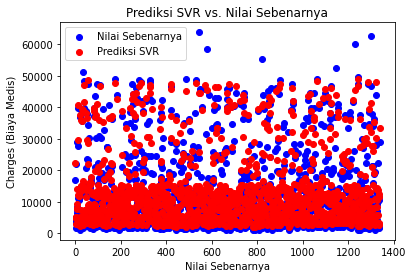

In [59]:
# Melakukan prediksi pada data latih
y_pred_scaled = svr.predict(X)

# Mengembalikan scaling pada hasil prediksi dan nilai sebenarnya
y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y)

# Plot hasil prediksi vs. nilai sebenarnya
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Nilai Sebenarnya')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Prediksi SVR')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Charges (Biaya Medis)')
plt.legend()
plt.title('Prediksi SVR vs. Nilai Sebenarnya')
plt.show()

##### Langkah 10: Mengevaluasi Model SVR

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_actual = y 
y_pred = svr.predict(X)
# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

# Menampilkan r-squared, mae, mse, rmse  
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8580074170742829
MAE: 0.20128586735349396
MSE: 0.14199258292571715
RMSE: 0.3768190320640893


- Kode diatas menghitung beberapa metrik evaluasi regresi seperti R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) untuk mengevaluasi kinerja model SVR. Hasilnya ditampilkan untuk memberikan pemahaman tentang sejauh mana model cocok dengan data sebenarnya dalam hal presisi dan kesalahan.